![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [ ]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [ ]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentimientos por aerolínea'}, xlabel='airline'>

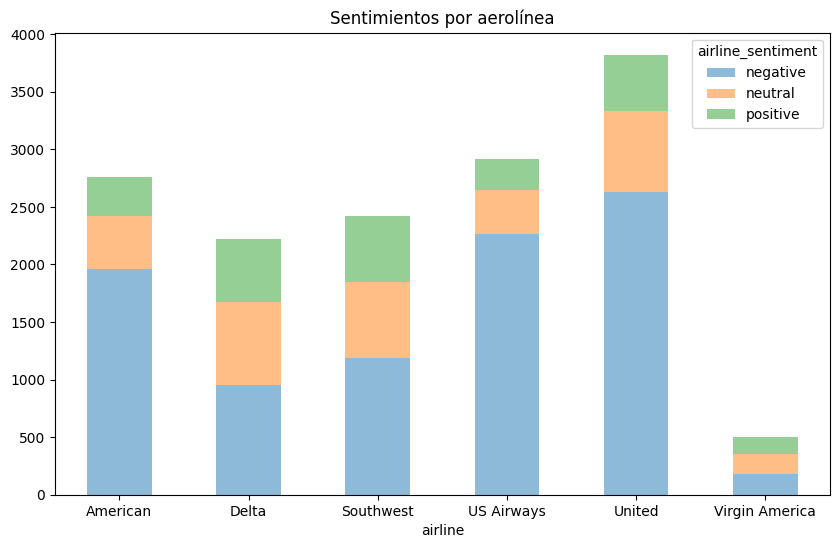

In [ ]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentimientos por aerolínea")

### Liberias y Variables de interés y predicción

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
# Se crea la matriz de documentos Xtrain usando CountVectorizer
vectA= CountVectorizer()
x_train_matriz = vectA.fit_transform(X_train)

# Se aplica el procesamiento hecho en el set de train al set de test

x_test_matriz = vectA.transform(X_test)

# Ahora se crea el algoritmo de random forest
rf = RandomForestClassifier(random_state=42)
# Se entrena con la matriz x_train_matriz
rf.fit(x_train_matriz, y_train)
# Se calculan las predicciones sobre la matriz de test.
predicciones = rf.predict(x_test_matriz)

accuracy = accuracy_score(y_test, predicciones)
print("El accuracy del modelo es de: " + str(accuracy))

El accuracy del modelo es de: 0.7711092715231788


Tal como podemos observar al entrenar un modelo de random forest classifier utilizando CountVectorizer sin eliminar stopwords o hacer tokenización utilizando n-gramas, se obtuvo un accuracy del 0.7711 el cual indica que el modelo tiene un rendimiento relativamente bueno para clasificar las clases correctamente. Sin embargo, aplicando alguno de estos métodos en el preprocesamiento podria mejorar su accuracy

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
vect_no_stopw = CountVectorizer(stop_words='english')

#Prepocesamiento datos de entrenamiento
x_train_matriz_2 = vect_no_stopw.fit_transform(X_train)

#Prepocesamiento datos de prueba
x_test_matriz_2 = vect_no_stopw.transform(X_test)

#Se aplica el modelo random forest
rf_2 = RandomForestClassifier(random_state=42)
# Se entrena con la matriz x_train_matriz_2 (preprocesada)
rf_2.fit(x_train_matriz_2, y_train)
# Se calculan las predicciones sobre la matriz de test x_train_matriz_2 (preprocesada)
predicciones_2 = rf_2.predict(x_test_matriz_2)

accuracy_2 = accuracy_score(y_test, predicciones_2)
print("El accuracy del modelo eliminación de stopwords es de: " + str(accuracy_2))

El accuracy del modelo eliminación de stopwords es de: 0.761796357615894


In [ ]:
#se imprime las palabras eliminadas de stopwords (palabras más comunes)
print(vect_no_stopw.get_stop_words())

frozenset({'something', 'several', 'nothing', 'mill', 'see', 'always', 'while', 'me', 'also', 'three', 'next', 'her', 'so', 'name', 'even', 'hence', 'thereafter', 'he', 'take', 'serious', 'latterly', 'every', 'why', 'whence', 'ie', 'former', 'side', 'anyhow', 'well', 'how', 'noone', 'where', 'his', 'with', 'own', 'them', 'therein', 'fifteen', 'since', 'of', 'toward', 'themselves', 'fire', 'hers', 'the', 'still', 'perhaps', 'moreover', 'everyone', 'seeming', 'thereby', 'down', 'somewhere', 'most', 'six', 'amoungst', 'already', 'being', 'had', 'often', 'we', 'may', 'himself', 'elsewhere', 'through', 'somehow', 'last', 'cry', 'ten', 'towards', 'what', 'for', 'along', 'beforehand', 'again', 'twelve', 'bottom', 'everything', 'hundred', 'nobody', 'when', 'eleven', 'you', 'co', 'i', 'yours', 'seem', 'enough', 'hasnt', 'else', 'yourself', 'amount', 'been', 'across', 'behind', 'has', 'yourselves', 'empty', 'onto', 'should', 'were', 'without', 'both', 'then', 'over', 'eight', 'etc', 'namely', 's

Al utilizar el preprocesamiento de CountVectorizer con eliminación de palabras y posteriormente el modelo de random forest obtuvimos un accuracy de 76.17%. Este valor es bueno, sin embargo, se puede validar y/o explorar la aplicación de otros técnicas para mejorar el rendimiento del modelo.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Importación de librerías
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# recursos complementarios necesarios de nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

# Inicialización de lematizador
lematizador = WordNetLemmatizer()

# Función para lematizar los verbos
def lematizar_verbos(texto):
    palabras = nltk.word_tokenize(texto.lower())
    return [lematizador.lemmatize(w, 'v') for w in palabras]

# Función de análisis personalizado para CountVectorizer centrado en verbos
def analizador_verbos(texto):
    return lematizar_verbos(texto)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Función que encapsula el entrenamiento, validación cruzada y evaluación en prueba
def probar_modelo(vect, X_train, y_train, X_test, y_test):
    # Vectorización de los datos de entrenamiento y prueba
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)

    # Creación y configuración del modelo de Random Forest
    modelo_rf = RandomForestClassifier(random_state=42)

    # Entrenamiento del modelo con los datos de entrenamiento
    modelo_rf.fit(X_train_dtm, y_train)

    # Validación cruzada en el conjunto de entrenamiento
    resultados = cross_val_score(modelo_rf, X_train_dtm, y_train, cv=10)
    print('Features: ', X_train_dtm.shape[1])
    print(pd.Series(resultados).describe())

    media_resultados = resultados.mean()
    print("Media del accuracy score de validación cruzada: {:.4f}".format(media_resultados))
    # Evaluación del modelo en el conjunto de prueba
    precision_test = modelo_rf.score(X_test_dtm, y_test)
    print("Precisión en el conjunto de prueba: {:.4f}".format(precision_test))
    return media_resultados
# Creación del vectorizador con el analizador de verbos
vect = CountVectorizer(analyzer=analizador_verbos)

# Prueba del modelo con validación cruzada y análisis de los resultados
accuracy_rf_3 = probar_modelo(vect, X_train, y_train, X_test, y_test)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Features:  12371
count    10.000000
mean      0.760637
std       0.012416
min       0.739512
25%       0.753659
50%       0.761835
75%       0.763845
max       0.787317
dtype: float64
Media del accuracy score de validación cruzada: 0.7606
Precisión en el conjunto de prueba: 0.7785


En el análisis del rendimiento del modelo de clasificación Random Forest aplicado a nuestro conjunto de datos vectorizado, observamos que el modelo es capaz de manejar eficientemente un extenso vocabulario de 12,371 características únicas, logrando una precisión media del 76.06% a través de una validación cruzada de 10 pliegues. Esta precisión promedio sugiere que el modelo tiene un desempeño general bueno en la predicción de los datos de prueba. La desviación estándar de las precisiones obtenidas en los pliegues es relativamente baja (0.0124), lo cual indica que el modelo ofrece un rendimiento estable y no es excesivamente sensible a las variaciones en las particiones de los datos.

El rango de precisión, desde un mínimo de 73.95% hasta un máximo de 78.73%, refleja tanto la capacidad del modelo para adaptarse a diferentes muestras del conjunto de datos como las limitaciones inherentes al mismo cuando se enfrenta a segmentos posiblemente más complejos o menos representativos. Además, la precisión en el conjunto de prueba alcanzó un 77.85%.

Estos resultados representan el desempeño más alto alcanzado hasta el momento en nuestras pruebas de modelos con el actual conjunto de datos y enfoque de análisis. Sugieren que el enfoque de lematización centrado en verbos, junto con el análisis mediante Random Forest, proporciona buenos resultados, lo cual es punto de partida para el siguiente punto en busqueda de una mejoria.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4

# recursos complementarios necesarios de nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

# Inicialización de lematizador
lematizador = WordNetLemmatizer()

# Creación del vectorizador que elimina stopwords e integra la función de lematización de verbos
vect_4 = CountVectorizer(stop_words='english', analyzer=analizador_verbos)

# Vectorización de los datos de entrenamiento y prueba utilizando el CountVectorizer configurado
x_train_matriz_4 = vect_4.fit_transform(X_train)
x_test_matriz_4 = vect_4.transform(X_test)

# Creación y entrenamiento del modelo de Random Forest
rf_4 = RandomForestClassifier(random_state=42)
rf_4.fit(x_train_matriz_4, y_train)

predicciones_4 = rf_4.predict(x_test_matriz_4)

accuracy_rf_4 = accuracy_score(y_test, predicciones_4)

print("El accuracy del modelo con eliminación de stopwords y lematización de verbos es de: {:.4f}".format(accuracy_rf_4))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


El accuracy del modelo con eliminación de stopwords y lematización de verbos es de: 0.7785


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

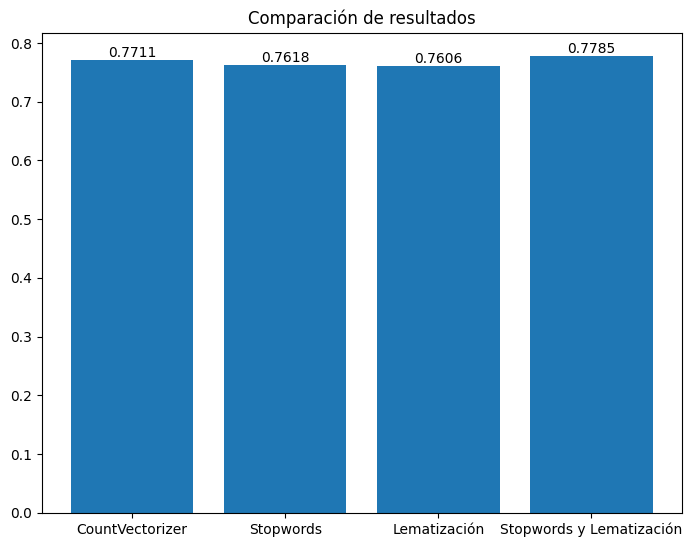

In [ ]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de resultados")
ejeX = ['CountVectorizer', 'Stopwords', 'Lematización', 'Stopwords y Lematización']
ejeY = [round(accuracy,4),round(accuracy_2,4), round(accuracy_rf_3,4), round(accuracy_rf_4,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plt.text(i, y[i], str(y[i]), ha='center', va='bottom')
addlabels(ejeX,ejeY,plt)
plt.show()

Se puede ver que el mejor accuracy lo tuvo el modelo híbrido, el que combina tanto Stopwords como lematización. Desde la teoría parece ser algo coherente ya que los tweets deben contener no solo muchas palabras que no brindan significado adicional al texto, sino que también, al ser escritura informal, pueden existir muchas palabras que significan lo mismo pero se escriben de diferentes maneras, por lo que el tener el cuenta ambos métodos de preprocesamiento, lleva a un mejor poder predictivo del modelo.